<a href="https://colab.research.google.com/github/Gakori/Financial-inclusion/blob/master/finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Research Question


Problem statement: figure out how we can predict which individuals are most likely to have or use a bank account

Solution:help provide an indication of the state of financial inclusion in the stated countries while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### a) Define metric for success
From the question, the analysis should predict individuals who are most *likely/have bank accounts*.This can be done by considering different demographic factors and also the diff countries.

## 2.Load dataset

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset and prereview the top of the dataset
finance_df = pd.read_csv('Financial Dataset - 1.csv')
finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#find the shape of the dataset
finance_df.shape

(23524, 13)

In [ ]:
#checking for datatype of each column
finance_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
#decribe the data
finance_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


## 3. Tyding dataset

In [ ]:
#checking for null values
finance_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#chec for the shape of the new dataset
finance_df.shape

(23524, 13)

In [ ]:
finance_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#remove the row with nulls

finance_df.dropna(axis=0, inplace=True)

In [ ]:
#shape of the cleaned datset
finance_df.shape

(23343, 13)

In [ ]:
finance_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
#describe our datset
finance_df.describe()

,year,household_size,Respondent Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


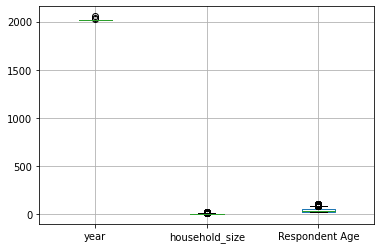

In [ ]:
#checking for outliers in year and age
finance_df.boxplot()

In [ ]:
finance_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

## 4.Univariate Analysis 

### a) Has bank account

In [ ]:
with_bank_ac = finance_df[finance_df['Has a Bank account'] == 'Yes'].count().mean()
with_bank_ac

3300.0

In [ ]:
without_bank_ac = finance_df[finance_df['Has a Bank account'] == 'No'].count().mean()
without_bank_ac

20064.0

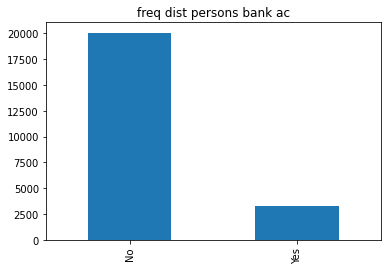

In [ ]:
finance=finance_df['Has a Bank account'].value_counts().plot.bar(title='freq dist persons bank ac')


*low number of persons who have bank accounts*

### b) Location


In [ ]:
rural = finance_df[finance_df['Type of Location'] == 'Rural']
rural['Type of Location'].value_counts().mean()

14275.0

In [ ]:
urban = finance_df[finance_df['Type of Location'] == 'Urban']
urban['Type of Location'].value_counts().mean()

9089.0

*the average persons in rural areas is more than in urban areas*

In [ ]:
#have bank account and live in urban
with_bank_urban = finance_df[(finance_df['Has a Bank account'] == 'Yes') & (finance_df['Type of Location'] == 'Urban')]
with_bank_urban.count().mean()

1635.0

In [ ]:
#have account and lin in rural
with_bank_rural = finance_df[(finance_df['Has a Bank account'] == 'Yes') & (finance_df['Type of Location'] == 'Rural')]
with_bank_rural.count().mean()

1665.0

*average persons who live in rural areas have bank accounts.this value is higher compared to those in urban and have A/Cs*

### c)cells phone acess

In [ ]:
have_cells = finance_df[finance_df['Cell Phone Access'] == 'Yes'].count().mean()
have_cells

17349.0

In [ ]:
have_no_cells =  finance_df[finance_df['Cell Phone Access'] == 'No'].count().mean()
have_no_cells 

## persons who have cells is more

6015.0

In [ ]:
cell_with_ac = finance_df[(finance_df['Has a Bank account'] == 'Yes') & (finance_df['Cell Phone Access'] == 'Yes')]
cell_with_ac.count().mean()

3196.0

In [ ]:
no_cell_with_ac = finance_df[(finance_df['Has a Bank account'] == 'Yes') & (finance_df['Cell Phone Access'] == 'No')]
no_cell_with_ac.count().mean()

104.0

Text(0.5, 0, 'Cell Phone Access')

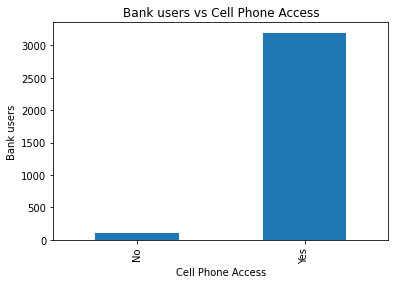

In [ ]:
df1 = (finance_df['Has a Bank account'] == 'Yes')
finance_df.loc[df1, ['Cell Phone Access', 'Has a Bank account']].groupby(['Cell Phone Access'])['Has a Bank account'].count().plot.bar()
plt.title(('Bank users vs Cell Phone Access'))
plt.ylabel('Bank users')
plt.xlabel('Cell Phone Access')

*the average persons who have cells also have accounts. from the graph those who hace cells have bank a/c*

### d)gender and account

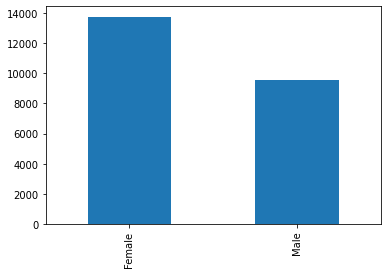

In [ ]:
finance_df['gender_of_respondent'].value_counts().plot.bar()

In [ ]:

female_with_ac = finance_df[(finance_df['Has a Bank account'] == 'Yes') & (finance_df['gender_of_respondent'] == 'Female')]
female_with_ac.count().mean()

1480.0

In [ ]:
male_with_ac = finance_df[(finance_df['Has a Bank account'] == 'Yes') & (finance_df['gender_of_respondent'] == 'Male')]
male_with_ac.count().mean()

##males who have a/c are more than women

1820.0

*males who have accounts are more than females*

### e)Educational level

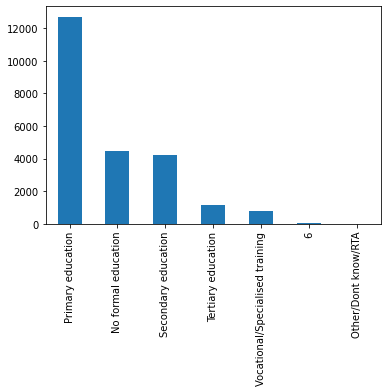

In [ ]:
finance_df['Level of Educuation'].value_counts().plot.bar()

##those who have primary ed are many compared to the others

Text(0.5, 0, 'level of education')

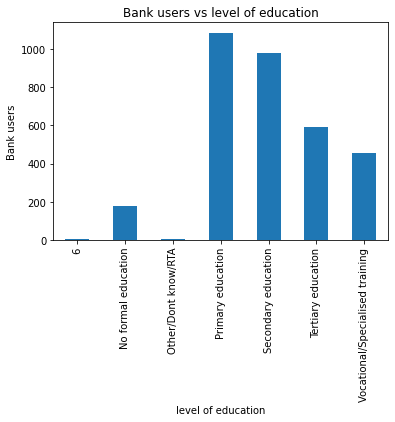

In [ ]:
ed = (finance_df['Has a Bank account'] == 'Yes')
finance_df.loc[df1, ['Level of Educuation', 'Has a Bank account']].groupby(['Level of Educuation'])['Has a Bank account'].count().plot.bar()
plt.title(('Bank users vs level of education'))
plt.ylabel('Bank users')
plt.xlabel('level of education')

##number of those with primary ed and with accounts is higher compared to the others level of education

### f)Type of job

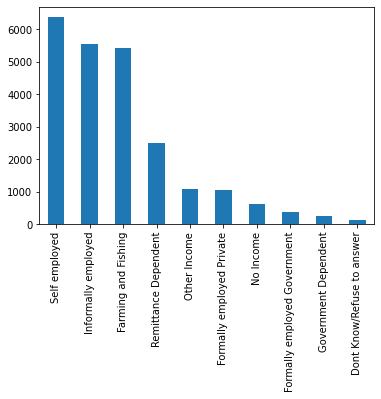

In [ ]:
finance_df['Type of Job'].value_counts().plot.bar()

Text(0.5, 0, 'job type')

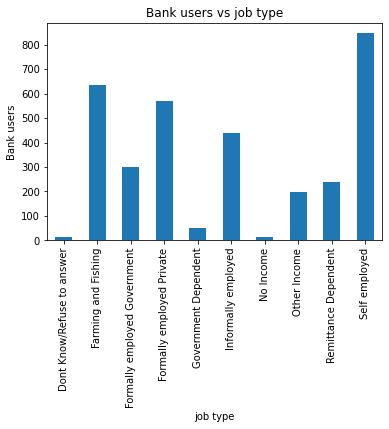

In [ ]:
job_with_ac = (finance_df['Has a Bank account'] == 'Yes')
finance_df.loc[job_with_ac, ['Type of Job', 'Has a Bank account']].groupby(['Type of Job'])['Has a Bank account'].count().plot.bar()
plt.title(('Bank users vs job type'))
plt.ylabel('Bank users')
plt.xlabel('job type')


### g) Countries

In [ ]:
df1 = (finance_df['Has a Bank account'] == 'Yes')
finance_df.loc[df1, ['country', 'Has a Bank account']].groupby(['country'])['Has a Bank account'].count()

country
Kenya       1520
Rwanda       998
Tanzania     601
Uganda       181
Name: Has a Bank account, dtype: int64

*kenya has most bank users*

Text(0.5, 0, 'countries')

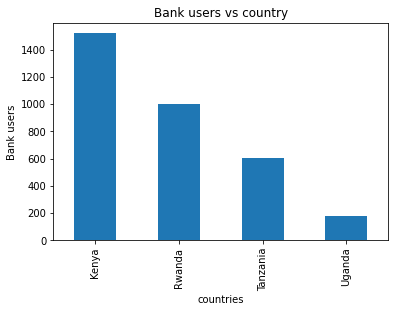

In [ ]:
df1 = (finance_df['Has a Bank account'] == 'Yes')
finance_df.loc[df1, ['country', 'Has a Bank account']].groupby(['country'])['Has a Bank account'].count().plot.bar()
plt.title(('Bank users vs country'))
plt.ylabel('Bank users')
plt.xlabel('countries')

### h) Year

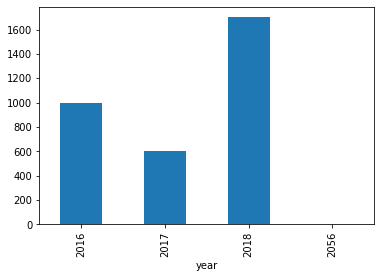

In [ ]:
df1 = (finance_df['Has a Bank account'] == 'Yes')
finance_df.loc[df1, ['year', 'Has a Bank account']].groupby(['year'])['Has a Bank account'].count().plot.bar()
plt.title(('Bank users vs year'))
plt.ylabel('Bank users')
plt.xlabel('year')

*2018 had the most bank users*

### 5.Bivariate Analysis

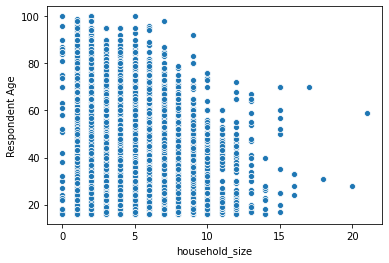

In [ ]:
sns.scatterplot(finance_df['household_size'], finance_df['Respondent Age'])

In [ ]:
pearson_coeff = finance_df["household_size"].corr(finance_df["Respondent Age"], method="pearson") 
print(pearson_coeff)

#this shows a weak correlation btwn housesize and age

-0.11970919507762415


In [309]:
finance_df["Respondent Age"].corr(finance_df["year"]) 
#this shows a weak correlation btwn age and year

-0.0190618449776902

### 7) Challenging the Solutions

The right data was provided for this question as we were mainly considering persons with bank accounts.To find those with bank accounts we put into consideration different demographic factors such as location.
From the analysis, Kenya has the highest no. of bank users, followed by Rwanda, Tanzania and finally Uganda.According to FII, kenya has shown high financial inclusions especially because of its mobile money services.
More improvements can be made on, education to increase financial literacy of people with or without accounts, more people haviving access to cells so as make use of mobile money services and encouraging more self employment.